In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopy
from geopy import distance #for distance
%config IPCompleter.greedy=True

In [2]:
%matplotlib inline
df = pd.read_csv('metro-bike-share-trip-data.csv')

/Users/matttuazon/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Replaces spaces with _ and get rid of parenthesis 
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [4]:
df["Trip_ID"].astype(int)
df["Duration"].astype(int)
df["Start_Time"].astype(str)
df["End_Time"].astype(str)
df["Starting_Station_ID"].astype(float)
df["Starting_Station_Latitude"].astype(float)
df["Starting_Station_Longitude"].astype(float)
df["Ending_Station_ID"].astype(float)
df["Ending_Station_Latitude"].astype(float)
df["Ending_Station_Longitude"].astype(float)
df["Bike_ID"].astype(float)
df["Trip_Route_Category"].astype(str)
df["Passholder_Type"].astype(str)
df["Starting_Lat-Long"].astype(str)
df["Ending_Lat-Long"].astype(str)

0         {'longitude': '-118.23721', 'latitude': '34.05...
1         {'longitude': '-118.23721', 'latitude': '34.05...
2         {'longitude': '-118.24156', 'latitude': '34.05...
3         {'longitude': '-118.24156', 'latitude': '34.05...
4         {'longitude': '-118.25588', 'latitude': '34.04...
5         {'longitude': '-118.23649', 'latitude': '34.03...
6         {'longitude': '-118.23721', 'latitude': '34.05...
7         {'longitude': '-118.25905', 'latitude': '34.04...
8         {'longitude': '-118.25244', 'latitude': '34.04...
9         {'longitude': '-118.23894', 'latitude': '34.06...
10        {'longitude': '-118.2664', 'latitude': '34.039...
11        {'longitude': '-118.25905', 'latitude': '34.04...
12        {'longitude': '-118.24353', 'latitude': '34.05...
13        {'longitude': '-118.26014', 'latitude': '34.04...
14        {'longitude': '-118.24353', 'latitude': '34.05...
15        {'longitude': '-118.25384', 'latitude': '34.04...
16        {'longitude': '-118.2558', 'la

In [6]:
#gets unique values in station ID column
df.Starting_Station_ID.unique()

array([3014., 3016., 3032., 3021., 3022., 3076., 3031., 3063., 3042.,
       3018., 3054., 3006., 3037., 3034., 3005., 3047., 3040., 3066.,
       3033., 3030., 3051., 3019., 3055., 3065., 3068., 3007., 3052.,
       3049., 3075., 3067., 3020., 3035., 3062., 3058., 3045., 3080.,
       3038., 3053., 3069., 3036., 3079., 4108., 3060., 3008., 3056.,
       3029., 3028., 3023., 3025., 3074., 3057., 3027., 3026., 3078.,
       3077., 3059., 3010., 3064., 3046., 3011., 3048., 3081., 3024.,
       3082.,   nan, 3000., 3009., 3039.])

In [7]:
#df.head()

In [8]:
#df.tail()

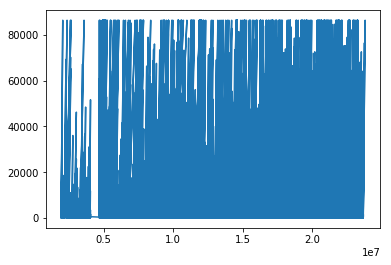

In [9]:
plt.plot(df.Trip_ID, df.Duration, 'o') #x,y,
plt.show()

In [ ]:
df.plot(title='Average Price', x='Trip_ID', y='Duration', kind='barh', figsize=(20,10))

KeyboardInterrupt: 

In [ ]:
plt.hist(["Trip ID", "Duration"], color=['orange','green'])
plt.xlabel("Trip ID")
plt.ylabel("Duration")
plt.legend(legend)
plt.xticks(range(1912818, 23664826))
plt.yticks(range(0,3000))
plt.title('Duration for Bike Trip')
plt.show()

In [5]:
#different data dependent on Passholder types
MonthlyPass = df[df.Passholder_Type == 'Monthly Pass']
FlexPass = df[df.Passholder_Type == 'Flex Pass']
Walk_Up = df[df.Passholder_Type == 'Walk-up']


In [ ]:
plt.plot(MonthlyPass.Duration, MonthlyPass.Trip_Route_Category)

In [6]:
Walk_Up

,Trip_ID,Duration,Start_Time,End_Time,Starting_Station_ID,Starting_Station_Latitude,Starting_Station_Longitude,Ending_Station_ID,Ending_Station_Latitude,Ending_Station_Longitude,Bike_ID,Plan_Duration,Trip_Route_Category,Passholder_Type,Starting_Lat-Long,Ending_Lat-Long
4,1940317,420,2016-07-07T12:51:00,2016-07-07T12:58:00,3032.0,34.049889,-118.255880,3032.0,34.049889,-118.255880,6674.0,0.0,Round Trip,Walk-up,"{'longitude': '-118.25588', 'latitude': '34.04...","{'longitude': '-118.25588', 'latitude': '34.04..."
282,2035311,780,2016-07-08T12:42:00,2016-07-08T12:55:00,3029.0,34.048851,-118.246420,3029.0,34.048851,-118.246420,6011.0,0.0,Round Trip,Walk-up,"{'longitude': '-118.24642', 'latitude': '34.04...","{'longitude': '-118.24642', 'latitude': '34.04..."
1784,2630411,180,2016-07-12T11:57:00,2016-07-12T12:00:00,3046.0,34.053021,-118.247950,3046.0,34.053021,-118.247950,6487.0,0.0,Round Trip,Walk-up,"{'longitude': '-118.24795', 'latitude': '34.05...","{'longitude': '-118.24795', 'latitude': '34.05..."
2505,2777818,300,2016-07-13T15:47:00,2016-07-13T15:52:00,3024.0,34.057720,-118.248970,3024.0,34.057720,-118.248970,6598.0,0.0,Round Trip,Walk-up,"{'longitude': '-118.24897', 'latitude': '34.05...","{'longitude': '-118.24897', 'latitude': '34.05..."
5537,3811317,240,2016-07-20T09:36:00,2016-07-20T09:40:00,4108.0,0.000000,0.000000,4108.0,0.000000,0.000000,5922.0,0.0,Round Trip,Walk-up,"{'longitude': '0.0', 'latitude': '0.0', 'needs...","{'longitude': '0.0', 'latitude': '0.0', 'needs..."
5675,3831437,480,2016-07-20T14:45:00,2016-07-20T14:53:00,4108.0,0.000000,0.000000,4108.0,0.000000,0.000000,6122.0,0.0,Round Trip,Walk-up,"{'longitude': '0.0', 'latitude': '0.0', 'needs...","{'longitude': '0.0', 'latitude': '0.0', 'needs..."
10013,4706289,1380,2016-07-29T14:11:00,2016-07-29T14:34:00,3058.0,34.035801,-118.233170,3058.0,34.035801,-118.233170,5724.0,0.0,Round Trip,Walk-up,"{'longitude': '-118.23317', 'latitude': '34.03...","{'longitude': '-118.23317', 'latitude': '34.03..."
10023,4706275,180,2016-07-29T14:34:00,2016-07-29T14:37:00,4108.0,0.000000,0.000000,4108.0,0.000000,0.000000,6390.0,0.0,Round Trip,Walk-up,"{'longitude': '0.0', 'latitude': '0.0', 'needs...","{'longitude': '0.0', 'latitude': '0.0', 'needs..."
10135,4706104,300,2016-07-29T17:24:00,2016-07-29T17:29:00,4108.0,0.000000,0.000000,4108.0,0.000000,0.000000,6028.0,0.0,Round Trip,Walk-up,"{'longitude': '0.0', 'latitude': '0.0', 'needs...","{'longitude': '0.0', 'latitude': '0.0', 'needs..."
10283,4705893,660,2016-07-29T21:14:00,2016-07-29T21:25:00,3048.0,34.041691,-118.235350,3048.0,34.041691,-118.235350,6626.0,0.0,Round Trip,Walk-up,"{'longitude': '-118.23535', 'latitude': '34.04...","{'longitude': '-118.23535', 'latitude': '34.04..."


In [12]:
df

,Trip_ID,Duration,Start_Time,End_Time,Starting_Station_ID,Starting_Station_Latitude,Starting_Station_Longitude,Ending_Station_ID,Ending_Station_Latitude,Ending_Station_Longitude,Bike_ID,Plan_Duration,Trip_Route_Category,Passholder_Type,Starting_Lat-Long,Ending_Lat-Long
0,1912818,180,2016-07-07T04:17:00,2016-07-07T04:20:00,3014.0,34.056610,-118.237210,3014.0,34.056610,-118.237210,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05..."
1,1919661,1980,2016-07-07T06:00:00,2016-07-07T06:33:00,3014.0,34.056610,-118.237210,3014.0,34.056610,-118.237210,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05..."
2,1933383,300,2016-07-07T10:32:00,2016-07-07T10:37:00,3016.0,34.052898,-118.241560,3016.0,34.052898,-118.241560,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05..."
3,1944197,10860,2016-07-07T10:37:00,2016-07-07T13:38:00,3016.0,34.052898,-118.241560,3016.0,34.052898,-118.241560,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05..."
4,1940317,420,2016-07-07T12:51:00,2016-07-07T12:58:00,3032.0,34.049889,-118.255880,3032.0,34.049889,-118.255880,6674.0,0.0,Round Trip,Walk-up,"{'longitude': '-118.25588', 'latitude': '34.04...","{'longitude': '-118.25588', 'latitude': '34.04..."
5,1944075,780,2016-07-07T12:51:00,2016-07-07T13:04:00,3021.0,34.045609,-118.237030,3054.0,34.039219,-118.236490,6717.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.23703', 'latitude': '34.04...","{'longitude': '-118.23649', 'latitude': '34.03..."
6,1944073,600,2016-07-07T12:54:00,2016-07-07T13:04:00,3022.0,34.046070,-118.233090,3014.0,34.056610,-118.237210,5721.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.23309', 'latitude': '34.04...","{'longitude': '-118.23721', 'latitude': '34.05..."
7,1944067,600,2016-07-07T12:59:00,2016-07-07T13:09:00,3076.0,34.040600,-118.253840,3005.0,34.048550,-118.259050,5957.0,365.0,One Way,Flex Pass,"{'longitude': '-118.25384', 'latitude': '34.04...","{'longitude': '-118.25905', 'latitude': '34.04..."
8,1944062,2880,2016-07-07T13:01:00,2016-07-07T13:49:00,3031.0,34.044701,-118.252440,3031.0,34.044701,-118.252440,6137.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.25244', 'latitude': '34.04...","{'longitude': '-118.25244', 'latitude': '34.04..."
9,1944063,960,2016-07-07T13:01:00,2016-07-07T13:17:00,3031.0,34.044701,-118.252440,3078.0,34.064281,-118.238940,6351.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.25244', 'latitude': '34.04...","{'longitude': '-118.23894', 'latitude': '34.06..."


In [13]:
coords_1 = (34.045609, -118.237030)
coords_2 = (34.039219, -118.236490)

In [14]:
d = distance.distance
print(d(coords_1, coords_2))

0.7105506726560069 km


538.3904453677204
